### 1. Import the libraries

In [11]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import json
import pandas as pd
import os


import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# 1. Upload the customers_info and do the analysis

In [13]:
customers_info = pd.read_csv('customers_info.csv', encoding='latin1')
print(customers_info.shape)
customers_info.head()

FileNotFoundError: [Errno 2] No such file or directory: '\\customers_info.csv'

### Customer Segmentation:

#### Analyze the distribution of customer segments using a pie chart or bar chart.

<AxesSubplot:ylabel='Segment'>

Text(0.5, 1.0, 'Customer Segmentation')

Text(0, 0.5, '')

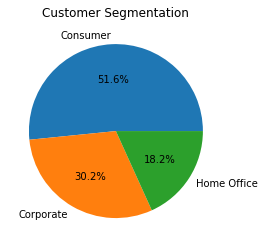

In [115]:
segment_counts = customers_info['Segment'].value_counts()
segment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.ylabel('')
plt.show()


### Geographic Analysis:

#### Explore the distribution of customers across different countries, cities, states, and regions.

<AxesSubplot:>

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 10 Countries by Customer Count')

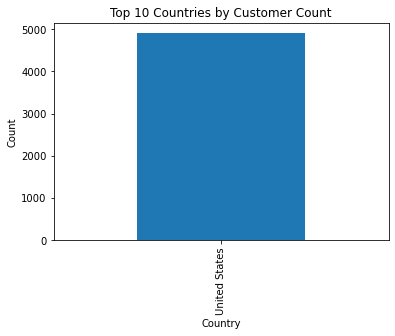

In [116]:
country_counts = customers_info['Country'].value_counts().head(10)
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Customer Count')
plt.show()


### State and Region Analysis:

#### Analyze the distribution of customers across different states and regions.

<AxesSubplot:>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Customer Count by State')

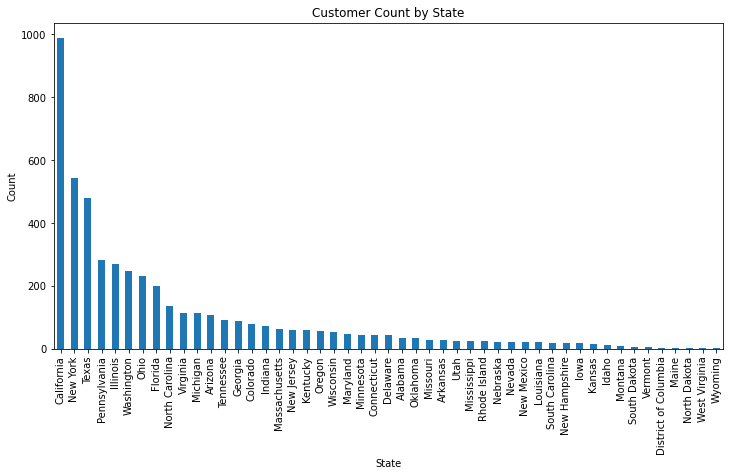

In [117]:
state_counts = customers_info['State'].value_counts()
state_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Customer Count by State')
plt.show()


### Postal Code Analysis:

#### Examine the customer distribution based on postal codes.

<Figure size 720x432 with 0 Axes>

(array([105.,  83., 475.,  65.,  34., 325., 155.,  15., 189., 238.,  53.,
        126., 157., 147., 156.,  51.,  63.,  15., 275.,  30.,  31.,  51.,
        188., 309.,  93., 142.,  43., 592., 399., 305.]),
 array([ 1040.        ,  4315.36666667,  7590.73333333, 10866.1       ,
        14141.46666667, 17416.83333333, 20692.2       , 23967.56666667,
        27242.93333333, 30518.3       , 33793.66666667, 37069.03333333,
        40344.4       , 43619.76666667, 46895.13333333, 50170.5       ,
        53445.86666667, 56721.23333333, 59996.6       , 63271.96666667,
        66547.33333333, 69822.7       , 73098.06666667, 76373.43333333,
        79648.8       , 82924.16666667, 86199.53333333, 89474.9       ,
        92750.26666667, 96025.63333333, 99301.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Postal Code')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Postal Codes')

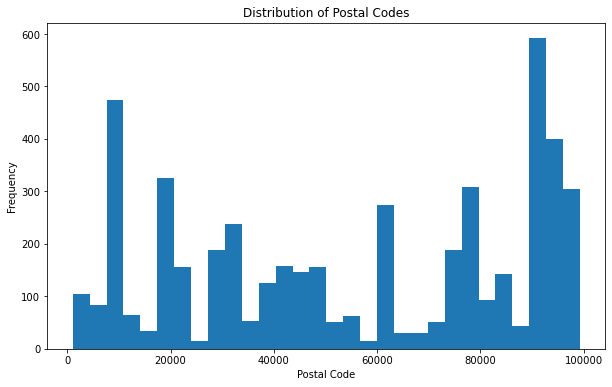

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(customers_info['Postal Code'], bins=30)
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.title('Distribution of Postal Codes')
plt.show()


### Additional Analysis:

#### Perform further analysis based on the available columns, such as analyzing customer names or examining relationships between columns (e.g., customer count by segment in each country or region).

<AxesSubplot:xlabel='Country'>

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Customer Count by Segment in Each Country')

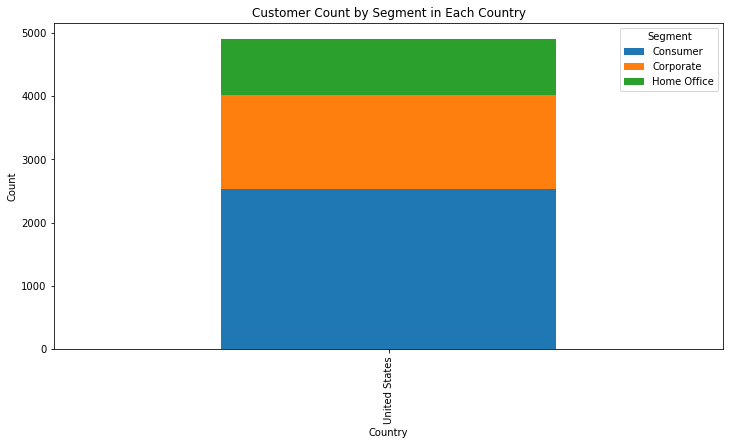

In [119]:
country_segment_counts = customers_info.groupby(['Country', 'Segment']).size().unstack().fillna(0)
country_segment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Customer Count by Segment in Each Country')
plt.show()


#  2. Upload the customer_transaction_info and do the analysis

In [121]:
customer_transaction_info = pd.read_csv(r'C:\Users\jjasm\OneDrive\BMC-TakeHome-Data Scientist\data-csv\customer_transaction_info.csv', encoding='latin1')
print(customer_transaction_info.shape)
customer_transaction_info.head()

(9994, 10)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,1.478560e+12,1.478820e+12,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,CA-2016-152156,1.478560e+12,1.478820e+12,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,CA-2016-138688,1.465690e+12,1.466040e+12,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,US-2015-108966,1.444520e+12,1.445130e+12,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,US-2015-108966,1.444520e+12,1.445130e+12,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164


### Analysis of customer_transaction_info

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Orders by Order ID')

Text(0.5, 0, 'Order ID')

Text(0, 0.5, 'Count')

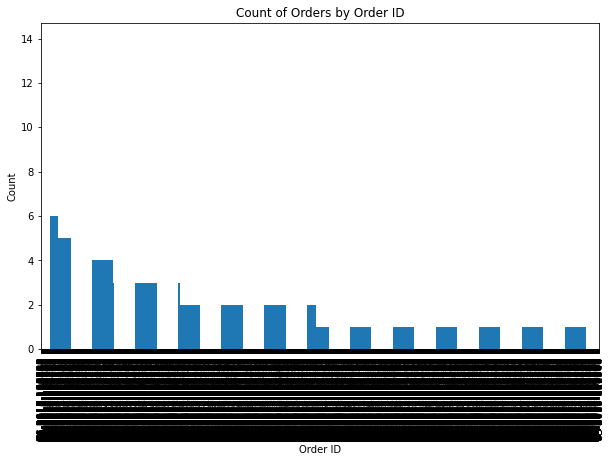

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Orders by Ship Mode')

Text(0.5, 0, 'Ship Mode')

Text(0, 0.5, 'Count')

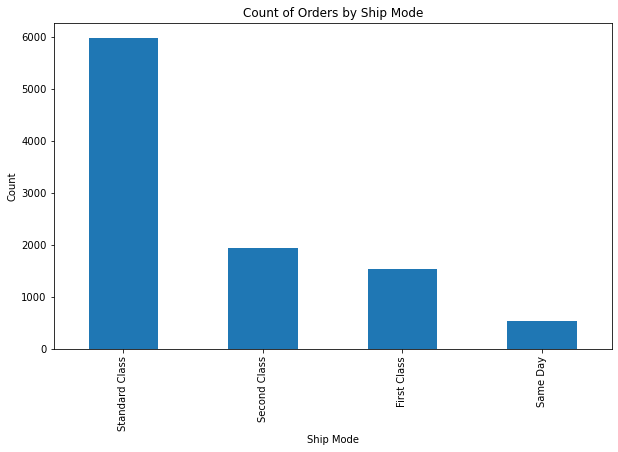

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Orders by Customer ID')

Text(0.5, 0, 'Customer ID')

Text(0, 0.5, 'Count')

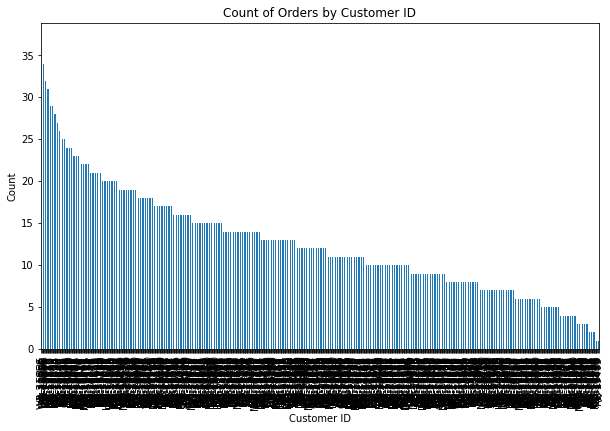

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Orders by Product ID')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Count')

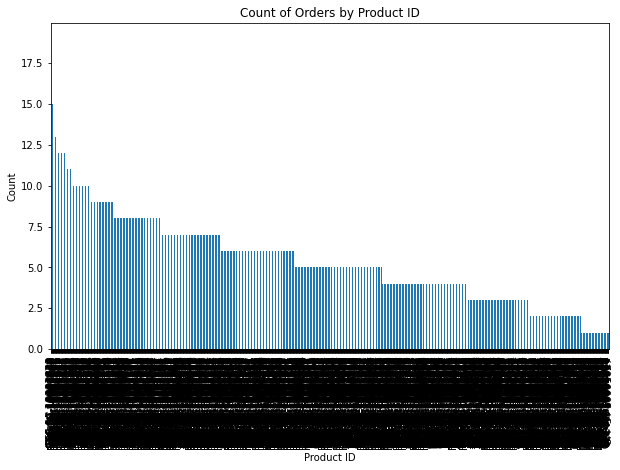

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named "customer_transaction_info"

# Calculate the count of unique Order IDs
order_id_counts = customer_transaction_info['Order ID'].value_counts()

# Plot the bar chart for Order IDs
plt.figure(figsize=(10, 6))
order_id_counts.plot(kind='bar')
plt.title('Count of Orders by Order ID')
plt.xlabel('Order ID')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Ship Modes
ship_mode_counts = customer_transaction_info['Ship Mode'].value_counts()

# Plot the bar chart for Ship Modes
plt.figure(figsize=(10, 6))
ship_mode_counts.plot(kind='bar')
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Customer IDs
customer_id_counts = customer_transaction_info['Customer ID'].value_counts()

# Plot the bar chart for Customer IDs
plt.figure(figsize=(10, 6))
customer_id_counts.plot(kind='bar')
plt.title('Count of Orders by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Product IDs
product_id_counts = customer_transaction_info['Product ID'].value_counts()

# Plot the bar chart for Product IDs
plt.figure(figsize=(10, 6))
product_id_counts.plot(kind='bar')
plt.title('Count of Orders by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.show()


In [ ]:
### Do some line by line analysis

In [124]:
# Check the uniqueness of Order IDs: 
customer_transaction_info['Order ID'].nunique()

5009

In [125]:
#Get the count of orders: 
customer_transaction_info['Order ID'].count()

9994

In [126]:
#Explore the distribution of order IDs: 
    
customer_transaction_info['Order ID'].value_counts()

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64

In [127]:
## Order Date and Ship Date:

##Convert the columns to datetime format:
customer_transaction_info['Order Date'] = pd.to_datetime(customer_transaction_info['Order Date'])
customer_transaction_info['Ship Date'] = pd.to_datetime(customer_transaction_info['Ship Date'])


In [129]:
##Calculate the time taken for shipping: 
customer_transaction_info['Shipping Time'] = customer_transaction_info['Ship Date'] - customer_transaction_info['Order Date']
customer_transaction_info['Shipping Time']


0      0 days 00:00:00.260000
1      0 days 00:00:00.260000
2      0 days 00:00:00.350000
3      0 days 00:00:00.610000
4      0 days 00:00:00.610000
                ...          
9989   0 days 00:00:00.180000
9990   0 days 00:00:00.430000
9991   0 days 00:00:00.430000
9992   0 days 00:00:00.430000
9993   0 days 00:00:00.430000
Name: Shipping Time, Length: 9994, dtype: timedelta64[ns]

In [130]:
## Analyze the statistics of shipping time: 
customer_transaction_info['Shipping Time'].describe()

count                         9994
mean     0 days 00:00:00.342055233
std      0 days 00:00:00.150964604
min                0 days 00:00:00
25%         0 days 00:00:00.260000
50%         0 days 00:00:00.350000
75%         0 days 00:00:00.430000
max         0 days 00:00:00.610000
Name: Shipping Time, dtype: object

In [131]:
# Check the different ship modes: 
customer_transaction_info['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [132]:
#Count the occurrences of each ship mode: 
customer_transaction_info['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:>

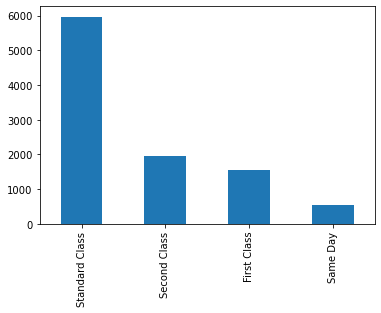

In [133]:
#Visualize the distribution of ship modes using a bar plot: 
customer_transaction_info['Ship Mode'].value_counts().plot(kind='bar')

In [134]:
#Check the uniqueness of customer and product IDs: 
customer_transaction_info['Customer ID'].nunique(), customer_transaction_info['Product ID'].nunique()

(793, 1862)

In [135]:
#Count the occurrences of each customer and product: 
customer_transaction_info['Customer ID'].value_counts(), customer_transaction_info['Product ID'].value_counts()

(WB-21850    37
 JL-15835    34
 MA-17560    34
 PP-18955    34
 CK-12205    32
             ..
 LD-16855     1
 AO-10810     1
 CJ-11875     1
 RE-19405     1
 JR-15700     1
 Name: Customer ID, Length: 793, dtype: int64,
 OFF-PA-10001970    19
 TEC-AC-10003832    18
 FUR-FU-10004270    16
 FUR-CH-10001146    15
 TEC-AC-10003628    15
                    ..
 TEC-PH-10003535     1
 TEC-MA-10002937     1
 OFF-AR-10004974     1
 TEC-AC-10004814     1
 OFF-ST-10001627     1
 Name: Product ID, Length: 1862, dtype: int64)

In [136]:
#Analyze the descriptive statistics of these numerical columns: 
customer_transaction_info[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [138]:
#Analyze the descriptive statistics of these numerical columns: 
customer_transaction_info[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:ylabel='Frequency'>

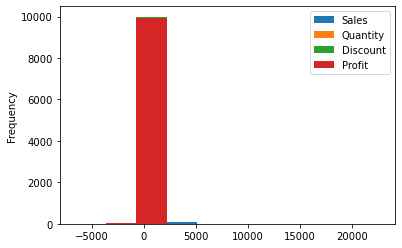

In [139]:
#Visualize the distributions using histograms or box plots: 
customer_transaction_info[['Sales', 'Quantity', 'Discount', 'Profit']].plot(kind='hist') or customer_transaction_info[['Sales', 'Quantity', 'Discount', 'Profit']].plot(kind='box')

# 3. Upload the data - orders_returned_info
#### 1. Here we want to only build the predictive models whether a customer will buy printer related product.
#### 2. Below table shows the data that customers bought the product and then returned it. Customer's buying product information is 
#### already in the customers_info and product_info. So let's not use below table. 
### 3. But still we can do some analysis.

In [143]:
orders_returned_info = pd.read_csv(r'C:\Users\jjasm\OneDrive\BMC-TakeHome-Data Scientist\data-csv\orders_returned_info.csv', encoding='latin1')
print(orders_returned_info.shape)
orders_returned_info.head()

(1, 592)


,Returned,Order ID,Returned.1,Order ID.1,Returned.2,Order ID.2,Returned.3,Order ID.3,Returned.4,Order ID.4,...,Returned.291,Order ID.291,Returned.292,Order ID.292,Returned.293,Order ID.293,Returned.294,Order ID.294,Returned.295,Order ID.295
0,Yes,CA-2017-153822,Yes,CA-2017-129707,Yes,CA-2014-152345,Yes,CA-2015-156440,Yes,US-2017-155999,...,Yes,CA-2015-101910,Yes,CA-2017-156958,Yes,CA-2016-105585,Yes,CA-2016-148796,Yes,CA-2015-149636


# 4. Upload product_info and analysis

In [148]:
product_info = pd.read_csv(r'C:\Users\jjasm\OneDrive\BMC-TakeHome-Data Scientist\data-csv\product_info.csv', encoding='latin1')
print(product_info.shape)
product_info.head()

(1894, 4)


,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Product ID')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Count')

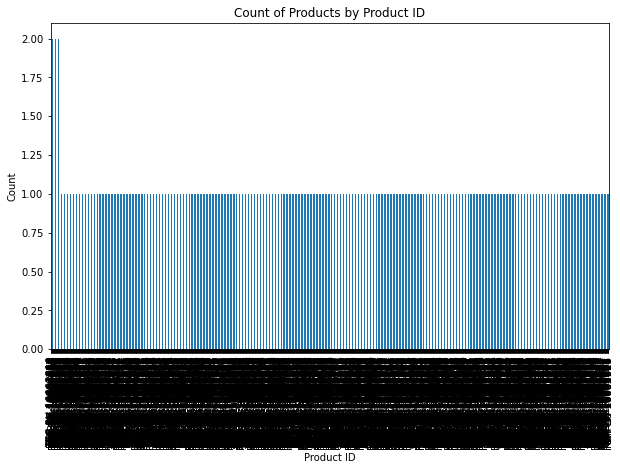

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

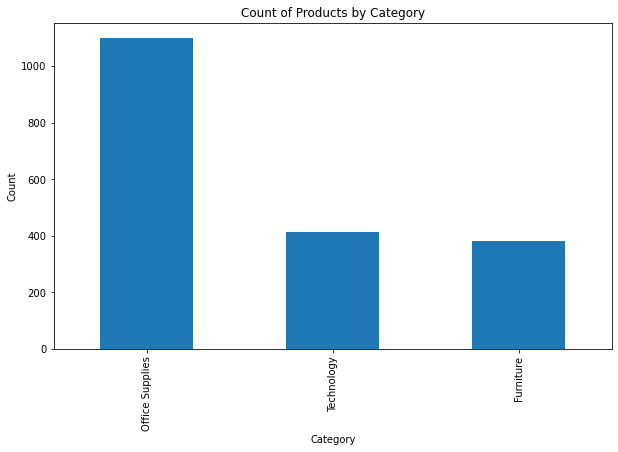

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Sub-Category')

Text(0.5, 0, 'Sub-Category')

Text(0, 0.5, 'Count')

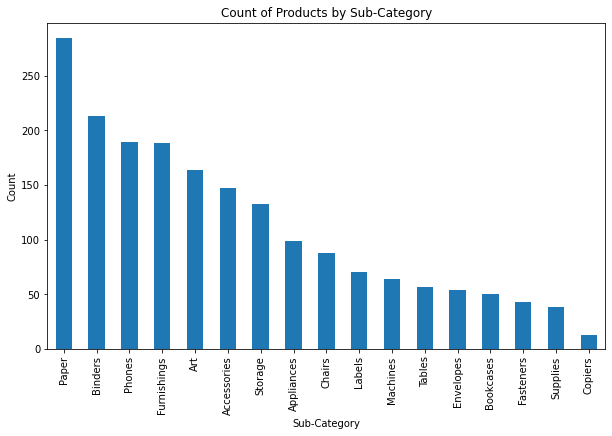

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Product Name')

Text(0.5, 0, 'Product Name')

Text(0, 0.5, 'Count')

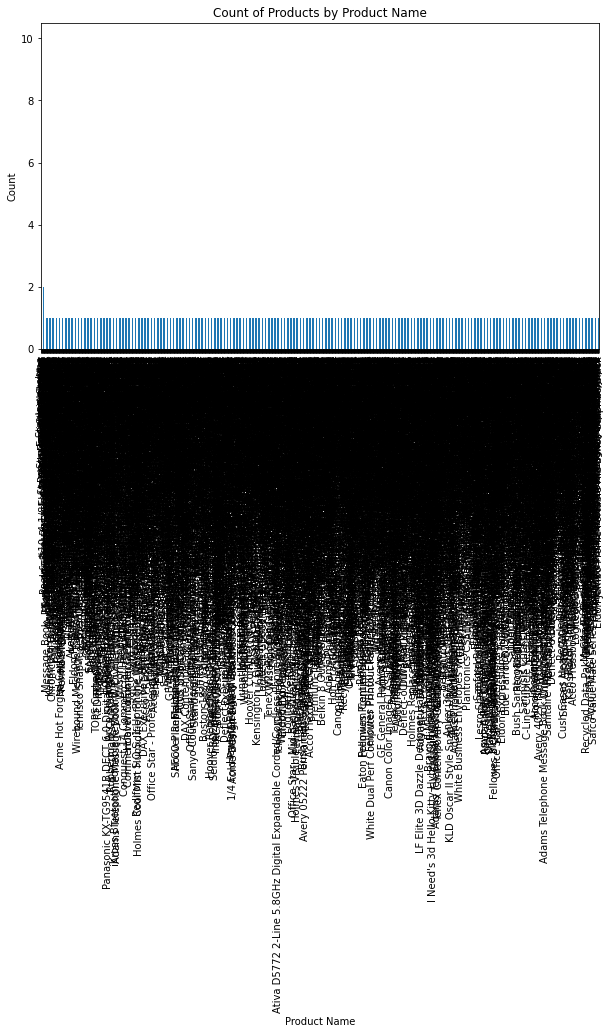

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named "product_info"

# Calculate the count of unique Product IDs
product_id_counts = product_info['Product ID'].value_counts()

# Plot the bar chart for Product IDs
plt.figure(figsize=(10, 6))
product_id_counts.plot(kind='bar')
plt.title('Count of Products by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Categories
category_counts = product_info['Category'].value_counts()

# Plot the bar chart for Categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Sub-Categories
sub_category_counts = product_info['Sub-Category'].value_counts()

# Plot the bar chart for Sub-Categories
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.title('Count of Products by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Product Names
product_name_counts = product_info['Product Name'].value_counts()

# Plot the bar chart for Product Names
plt.figure(figsize=(10, 6))
product_name_counts.plot(kind='bar')
plt.title('Count of Products by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()


# 5. Upload region_seller_info

In [150]:
region_seller_info = pd.read_csv(r'C:\Users\jjasm\OneDrive\BMC-TakeHome-Data Scientist\data-csv\region_seller_info.csv', encoding='latin1')
print(region_seller_info.shape)
region_seller_info.head()

(3, 4)


,Anna Andreadi,West,Femail,45
0,Chuck Magee,East,G,43
1,Kelly Williams,Central,NaN,35
2,Cassandra Brandow,South,F,9849


### filter the dataframe - product_info  if the Product Name 
field contains the word “printer" and the product sub-category is 'Machines.' ( As per instructions provided in pdf)
#### Do the analysis 

In [151]:
import pandas as pd

# Assuming your dataframe is named product_info
product_info = product_info[(product_info['Product Name'].str.contains('printer', case=False)) & 
                           (product_info['Sub-Category'] == 'Machines')]

# Displaying the filtered dataframe
print(product_info.shape)
product_info.head()


(38, 4)


,Product ID,Category,Sub-Category,Product Name
156,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
239,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...
382,TEC-MA-10000029,Technology,Machines,"Epson WorkForce WF-2530 All-in-One Printer, Co..."
389,TEC-MA-10002937,Technology,Machines,Canon Color ImageCLASS MF8580Cdw Wireless Lase...
577,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Product ID')

Text(0.5, 0, 'Product ID')

Text(0, 0.5, 'Count')

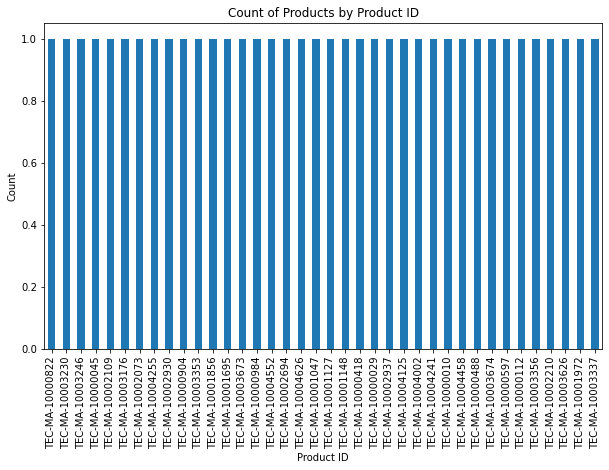

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

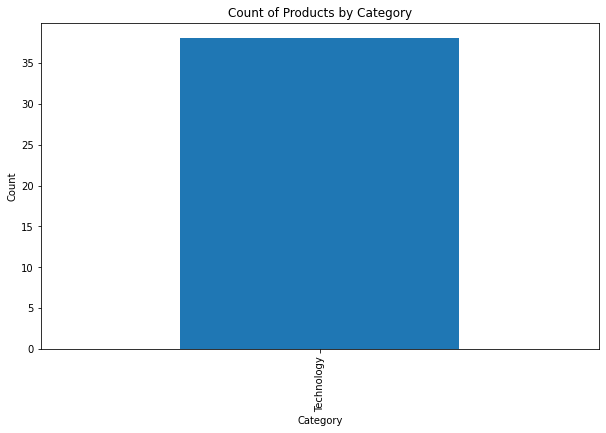

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Sub-Category')

Text(0.5, 0, 'Sub-Category')

Text(0, 0.5, 'Count')

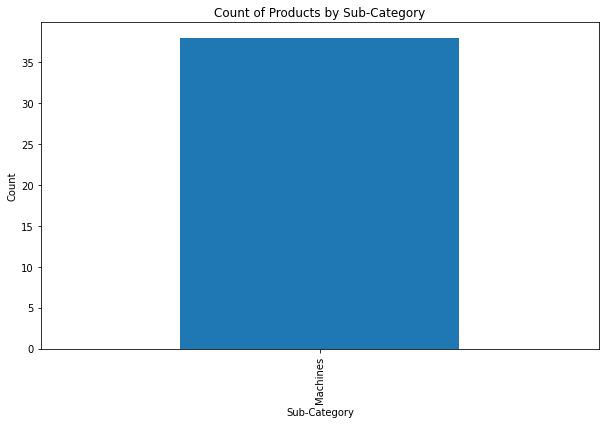

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Count of Products by Product Name')

Text(0.5, 0, 'Product Name')

Text(0, 0.5, 'Count')

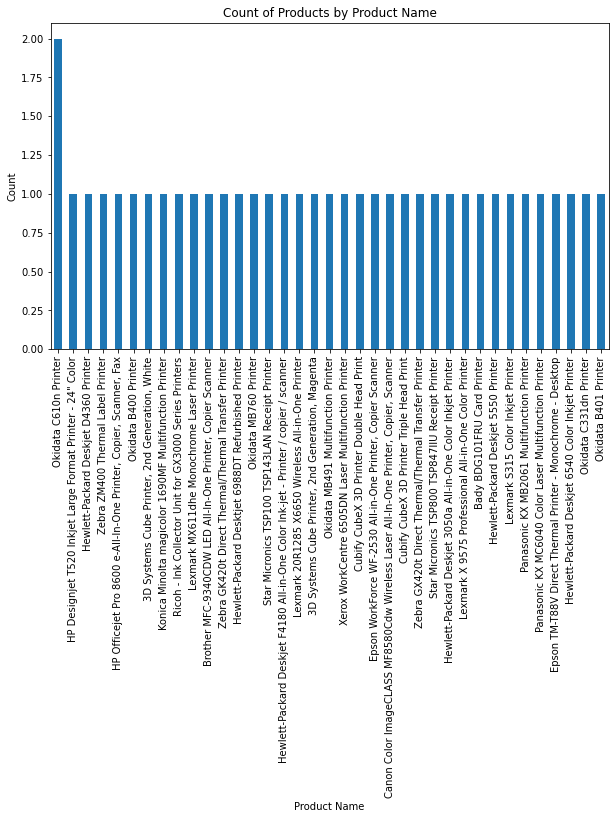

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named "product_info"

# Calculate the count of unique Product IDs
product_id_counts = product_info['Product ID'].value_counts()

# Plot the bar chart for Product IDs
plt.figure(figsize=(10, 6))
product_id_counts.plot(kind='bar')
plt.title('Count of Products by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Categories
category_counts = product_info['Category'].value_counts()

# Plot the bar chart for Categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Sub-Categories
sub_category_counts = product_info['Sub-Category'].value_counts()

# Plot the bar chart for Sub-Categories
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.title('Count of Products by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.show()

# Calculate the count of unique Product Names
product_name_counts = product_info['Product Name'].value_counts()

# Plot the bar chart for Product Names
plt.figure(figsize=(10, 6))
product_name_counts.plot(kind='bar')
plt.title('Count of Products by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()


In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# dataframe "product_info"

# Calculate the count of 'Product ID' across 'Product Name'
product_id_counts = product_info.groupby('Product Name')['Product ID'].nunique()

# Sort the counts in descending order
product_id_counts = product_id_counts.sort_values(ascending=False)
product_id_counts


Product Name
Okidata C610n Printer                                                                  2
3D Systems Cube Printer, 2nd Generation, Magenta                                       1
Lexmark MX611dhe Monochrome Laser Printer                                              1
Lexmark X 9575 Professional All-in-One Color Printer                                   1
Okidata B400 Printer                                                                   1
Okidata B401 Printer                                                                   1
Okidata C331dn Printer                                                                 1
Okidata MB491 Multifunction Printer                                                    1
Okidata MB760 Printer                                                                  1
Panasonic KX MB2061 Multifunction Printer                                              1
Panasonic KX MC6040 Color Laser Multifunction Printer                                  1
Ricoh - 

### Connect product_info and customer_transaction_info and customers_info

In [157]:
print(product_info.columns)
print(customer_transaction_info.columns)
print(customers_info.columns)

Index(['Product ID', 'Category', 'Sub-Category', 'Product Name'], dtype='object')
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Time'],
      dtype='object')
Index(['Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region'],
      dtype='object')


#####  Left joint dataframes - product_info, customer_transaction_info by key Product ID and return all rows from customer_transaction_info and 'Category', 'Sub-Category', 'Product Name' from product_info and filter the column - 'Product Name' if it contains the word 'printers' or 'printer' or 'Printer' and  'Sub-Category' is in ''Machines.'

In [160]:
import pandas as pd

#  "product_info" and "customer_transaction_info"

# Perform the left join
merged_df = customer_transaction_info.merge(product_info[['Product ID', 'Category', 'Sub-Category', 'Product Name']], on='Product ID', how='left')

# Apply filters on 'Product Name' and 'Sub-Category'
filtered_df = merged_df[(merged_df['Product Name'].str.contains('printers|printer|Printer')) & (merged_df['Sub-Category'] == 'Machines')]

# Print the filtered dataframe
print(filtered_df.shape)
filtered_df.head()

# Segment	Country	City	State	Postal Code	Region


(73, 14)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Time,Category,Sub-Category,Product Name
165,CA-2014-139892,1970-01-01 00:23:30.130,1970-01-01 00:23:30.480,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,0 days 00:00:00.350000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
223,CA-2015-169397,1970-01-01 00:24:10.920,1970-01-01 00:24:11.170,First Class,JB-15925,TEC-MA-10001148,479.988,4,0.7,-383.9904,0 days 00:00:00.250000,Technology,Machines,Okidata MB491 Multifunction Printer
262,US-2014-106992,1970-01-01 00:23:31.080,1970-01-01 00:23:31.260,Second Class,SB-20290,TEC-MA-10000822,3059.982,3,0.4,-509.9970,0 days 00:00:00.180000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
263,US-2014-106992,1970-01-01 00:23:31.080,1970-01-01 00:23:31.260,Second Class,SB-20290,TEC-MA-10003353,2519.958,7,0.4,-251.9958,0 days 00:00:00.180000,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...
427,CA-2014-101476,1970-01-01 00:23:30.480,1970-01-01 00:23:30.570,First Class,SD-20485,TEC-MA-10000029,69.990,1,0.0,30.0957,0 days 00:00:00.090000,Technology,Machines,"Epson WorkForce WF-2530 All-in-One Printer, Co..."


#### Now left join two dataframes -  filtered_df and customers_info by "Customer ID" and return all the columns from left table -  
#### filtered_df and column names - 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region'  from dataframe - customers_info

In [171]:
import pandas as pd

# Perform left join
merged_df = filtered_df.merge(customers_info[['Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region']],
                              on='Customer ID', how='left')

# Print the resulting merged dataframe
print(merged_df.shape)
merged_df.head()


(528, 20)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Time,Category,Sub-Category,Product Name,Segment,Country,City,State,Postal Code,Region
0,CA-2014-139892,1970-01-01 00:23:30.130,1970-01-01 00:23:30.480,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,0 days 00:00:00.350000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,Consumer,United States,San Antonio,Texas,78207,Central
1,CA-2014-139892,1970-01-01 00:23:30.130,1970-01-01 00:23:30.480,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,0 days 00:00:00.350000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,Consumer,United States,New York City,New York,10024,East
2,CA-2014-139892,1970-01-01 00:23:30.130,1970-01-01 00:23:30.480,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,0 days 00:00:00.350000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,Consumer,United States,Santa Barbara,California,93101,West
3,CA-2014-139892,1970-01-01 00:23:30.130,1970-01-01 00:23:30.480,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,0 days 00:00:00.350000,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,Consumer,United States,Des Moines,Washington,98198,West
4,CA-2015-169397,1970-01-01 00:24:10.920,1970-01-01 00:24:11.170,First Class,JB-15925,TEC-MA-10001148,479.988,4,0.7,-383.9904,0 days 00:00:00.250000,Technology,Machines,Okidata MB491 Multifunction Printer,Consumer,United States,Dublin,Ohio,43017,East


In [172]:
merged_df.to_csv('merged_df.csv')

### Number of products purchased by each customers and also see the purchase percentage for each customers.
### Calculate the count of "Product ID" for each "Customer ID" under column count_product_id and percentage of count of "Product ID"


In [177]:
import pandas as pd

# Calculate the sum of Quantity
quantity_sum = merged_df['Quantity'].sum()

# Create a pivot table with count and percentage


pivot_df = pd.pivot_table(merged_df, 
                          values='Product ID', 
                          index='Customer ID', 
                          aggfunc={'Product ID': 'count'})

# Rename the count column
pivot_df = pivot_df.rename(columns={'Product ID': 'count_product_id'})

# Calculate percentage
pivot_df['percentage'] = (pivot_df['count_product_id'] / quantity_sum)*100

# Print the resulting pivot table
pivot_df


,count_product_id,percentage
Customer ID,,
AG-10525,4,0.215285
AP-10915,9,0.484392
AS-10045,7,0.376749
BF-11020,8,0.430571
BM-11140,4,0.215285
...,...,...
SZ-20035,11,0.592034
TB-21400,7,0.376749
TS-21370,5,0.269107


### Plot line chart for quantity Vs discount for dataframe - merged_df in python

(array([119.,   7., 172.,   0.,  47.,  42.,   0.,  45.,   0.,  96.]),
 array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Discount')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Discount Histogram')

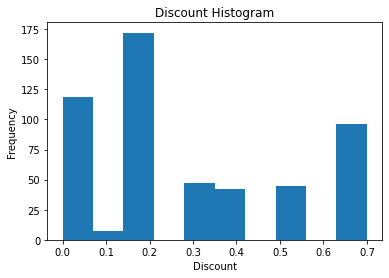

In [181]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(merged_df['Discount'], bins=10)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Discount Histogram')
plt.show()


####  From above graph, we see that maximum products were sold for discount 20% and when there was no discount, we see high sale.

In [197]:
filtered_df = merged_df[["Customer ID", "Product ID", "Quantity", "Discount","Product Name"]]
print(filtered_df.shape)
filtered_df.head()

(528, 5)


,Customer ID,Product ID,Quantity,Discount,Product Name
0,BM-11140,TEC-MA-10000822,8,0.4,Lexmark MX611dhe Monochrome Laser Printer
1,BM-11140,TEC-MA-10000822,8,0.4,Lexmark MX611dhe Monochrome Laser Printer
2,BM-11140,TEC-MA-10000822,8,0.4,Lexmark MX611dhe Monochrome Laser Printer
3,BM-11140,TEC-MA-10000822,8,0.4,Lexmark MX611dhe Monochrome Laser Printer
4,JB-15925,TEC-MA-10001148,4,0.7,Okidata MB491 Multifunction Printer


### Creating the customer-item matrix

In [198]:
customer_item_matrix = filtered_df.pivot_table(
    index='Customer ID',
    columns='Product ID',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.head()

Product ID,TEC-MA-10000010,TEC-MA-10000029,TEC-MA-10000045,TEC-MA-10000112,TEC-MA-10000418,TEC-MA-10000488,TEC-MA-10000597,TEC-MA-10000822,TEC-MA-10000904,TEC-MA-10000984,...,TEC-MA-10003626,TEC-MA-10003673,TEC-MA-10003674,TEC-MA-10004002,TEC-MA-10004125,TEC-MA-10004241,TEC-MA-10004255,TEC-MA-10004458,TEC-MA-10004552,TEC-MA-10004626
Customer ID,,,,,,,,,,,,,,,,,,,,,
AG-10525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AP-10915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN
AS-10045,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BF-11020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN
BM-11140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(69, 38)


## Collaborative Filtering

In [200]:
from sklearn.metrics.pairwise import cosine_similarity

## User based collaborative filtering

In [201]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
#Renaming index and column names

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['Customer ID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('Customer ID')
user_user_sim_matrix.head()

Customer ID,AG-10525,AP-10915,AS-10045,BF-11020,BM-11140,BO-11350,BP-11050,BS-11365,BW-11110,CC-12145,...,SE-20110,SM-20320,SR-20425,SR-20740,SU-20665,SZ-20035,TB-21400,TS-21370,TT-21070,WB-21850
Customer ID,,,,,,,,,,,,,,,,,,,,,
AG-10525,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP-10915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AS-10045,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BF-11020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BM-11140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
user_user_sim_matrix.loc['AG-10525'].sort_values(ascending=False).head(10)

Customer ID
AG-10525    1.00000
SB-20290    0.57735
LR-16915    0.00000
LW-16825    0.00000
MC-17425    0.00000
MJ-17740    0.00000
MS-17770    0.00000
MW-18235    0.00000
RL-19615    0.00000
NF-18385    0.00000
Name: AG-10525, dtype: float64

## Making Recommendations

In [204]:
user_user_sim_matrix.loc['AG-10525'].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc['AG-10525'][customer_item_matrix.loc['AG-10525']>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Customer ID
AG-10525    1.00000
SB-20290    0.57735
LR-16915    0.00000
LW-16825    0.00000
MC-17425    0.00000
             ...   
JB-15400    0.00000
JB-15925    0.00000
JH-15430    0.00000
JK-15640    0.00000
WB-21850    0.00000
Name: AG-10525, Length: 69, dtype: float64

Items Bought by A: 
Product ID
TEC-MA-10002210    1
Name: AG-10525, dtype: int64


In [205]:
items_bought_by_B = customer_item_matrix.loc['BM-11140'][customer_item_matrix.loc['BM-11140']>0]
print("Items bought by B:")
print(items_bought_by_B)

print()

items_to_recommend_to_B = set(items_bought_by_A.index) - set(items_bought_by_B.index)
print("Items to Recommend to B ")
print(items_to_recommend_to_B)
filtered_df.loc[filtered_df['Product ID'].isin(items_to_recommend_to_B),['Product ID', 'Product Name']].drop_duplicates().set_index('Product ID')

Items bought by B:
Product ID
TEC-MA-10000822    1
Name: BM-11140, dtype: int64

Items to Recommend to B 
{'TEC-MA-10002210'}


,Product Name
Product ID,
TEC-MA-10002210,Epson TM-T88V Direct Thermal Printer - Monochr...


## Item-based collaborative filtering

In [206]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['Product ID'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('Product ID')

In [207]:
print(item_item_sim_matrix)

Product ID       TEC-MA-10000010  TEC-MA-10000029  TEC-MA-10000045  \
Product ID                                                           
TEC-MA-10000010              1.0              0.0              0.0   
TEC-MA-10000029              0.0              1.0              0.0   
TEC-MA-10000045              0.0              0.0              1.0   
TEC-MA-10000112              0.0              0.0              0.0   
TEC-MA-10000418              0.0              0.0              0.0   
TEC-MA-10000488              0.0              0.0              0.0   
TEC-MA-10000597              0.0              0.0              0.0   
TEC-MA-10000822              0.0              0.0              0.0   
TEC-MA-10000904              0.0              0.0              0.0   
TEC-MA-10000984              0.0              0.0              0.0   
TEC-MA-10001047              0.0              0.0              0.0   
TEC-MA-10001127              0.0              0.0              0.0   
TEC-MA-10001148     

## Making Recommendations

In [218]:
top_10_similar_items = list(item_item_sim_matrix.loc['TEC-MA-10000010'].sort_values(ascending=False).iloc[:10].index)

print(top_10_similar_items)
print()
print(filtered_df.loc[
    filtered_df['Product ID'].isin(top_10_similar_items),
    ['Product ID', 'Product Name']
].drop_duplicates().set_index('Product ID').loc[top_10_similar_items])

['TEC-MA-10000010', 'TEC-MA-10003626', 'TEC-MA-10002937', 'TEC-MA-10003176', 'TEC-MA-10003230', 'TEC-MA-10003246', 'TEC-MA-10003337', 'TEC-MA-10003353', 'TEC-MA-10003356', 'TEC-MA-10003673']

                                                      Product Name
Product ID                                                        
TEC-MA-10000010  Hewlett-Packard Deskjet 3050a All-in-One Color...
TEC-MA-10003626  Hewlett-Packard Deskjet 6540 Color Inkjet Printer
TEC-MA-10002937  Canon Color ImageCLASS MF8580Cdw Wireless Lase...
TEC-MA-10003176                               Okidata B400 Printer
TEC-MA-10003230                              Okidata C610n Printer
TEC-MA-10003246              Hewlett-Packard Deskjet D4360 Printer
TEC-MA-10003337                               Okidata B401 Printer
TEC-MA-10003353  Xerox WorkCentre 6505DN Laser Multifunction Pr...
TEC-MA-10003356  Panasonic KX MC6040 Color Laser Multifunction ...
TEC-MA-10003673  Hewlett-Packard Desktjet 6988DT Refurbished Pr...
